<a href="https://colab.research.google.com/github/kumar6rishabh/New-Digit-PyTorch/blob/main/conv_new_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.profiler
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torchvision import datasets , transforms
from torch.utils.data import DataLoader , Dataset
from torch.autograd import Variable

In [ ]:
mnist_dataset = datasets.MNIST(root = "./data" , train = True , download = True , transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
cd = DataLoader(mnist_dataset , batch_size = 256 , shuffle = True , pin_memory = True)

In [ ]:
class Enc(nn.Module):
  def __init__(self):
    super(Enc , self).__init__()
    self.conv1 = nn.Conv2d(1 , 16 , 3 , stride = 1 , padding = 1)
    self.pool1 = nn.MaxPool2d(3)
    self.conv2 = nn.Conv2d(16 , 32 , 3 , stride = 1 , padding = 1)
    self.pool2 = nn.MaxPool2d(3)
    self.relu = nn.ReLU()
    self.tanh = nn.Tanh()
  def forward(self , x):
    out = self.conv1(x)
    out = self.pool1(out)
    out = self.relu(out)
    out = self.conv2(out)
    out = self.pool2(out)
    out = self.tanh(out)
    return out

In [ ]:
#o = (i - k + 2p) / s + 1  ,  (i - 1)s - 2p + k = o
#8 * 3 + 3

In [ ]:
class Dec(nn.Module):
  def __init__(self):
    super(Dec , self).__init__()
    self.tconv1 = nn.ConvTranspose2d(32 , 16 , 3 , stride = 3)
    self.relu = nn.ReLU()
    self.tconv2 = nn.ConvTranspose2d(16 , 1 , 3 , stride = 3)
  def forward(self , x):
    out = self.tconv1(x)
    out = self.relu(out)
    out = self.tconv2(out)
    return out

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
enc = Enc().to(device)
dec = Dec().to(device)

In [ ]:
loss_fn = nn.MSELoss()
optimizer1 = torch.optim.Adam(enc.parameters() , lr = 0.01)
optimizer2 = torch.optim.Adam(dec.parameters() , lr = 0.01)

In [ ]:
num_epochs = 100
losses = []
for epoch in range(num_epochs):
  ls = 0
  for (data , _) in cd:
    data = data[: , : , :27 , :27]
    data = data.to(device)
    out = enc(data)
    out = dec(out)
    loss = loss_fn(out , data)
    ls += loss.cpu().detach().numpy()
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    loss.backward()
    optimizer1.step()
    optimizer2.step()
  losses.append(ls)

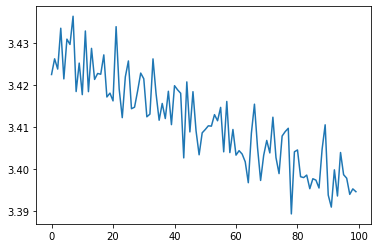

In [ ]:
plt.plot(losses)

In [ ]:
te = iter(cd).__next__()[0][8 , :].to(device)

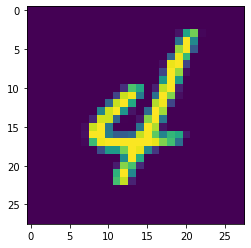

In [ ]:
plt.imshow(te.squeeze().cpu().detach().numpy())

In [ ]:
with torch.no_grad():
  tem = te.reshape(1 , 28 , 28)[: , :27 , :27]
  out = enc(tem)
  out = dec(out)

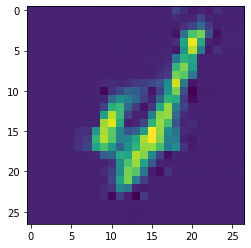

In [ ]:
plt.imshow(out.squeeze().cpu().detach().numpy())

In [ ]:
with torch.no_grad():
  all_means = []
  labels = mnist_dataset.train_labels
  for i in range(10):
    all_imgs = None
    label = i
    label_pos = torch.argwhere(labels == label).squeeze()
    imgs = mnist_dataset.train_data[label_pos]
    for j in range(imgs.shape[0]):
      ig = imgs[j , ...]
      img = transforms.ToTensor()(transforms.ToPILImage()(ig))
      if all_imgs is None:
        all_imgs = img[None , ...]
      else:
        all_imgs = torch.cat([all_imgs , img[None , ...]] , dim = 0)
    print(all_imgs[: , : , :27 , :27].shape)
    encc = enc(all_imgs[: , : , :27 , :27].to(device))
    print(encc.flatten(2).shape)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([5923, 1, 27, 27])
torch.Size([5923, 32, 9])
torch.Size([6742, 1, 27, 27])
torch.Size([6742, 32, 9])
torch.Size([5958, 1, 27, 27])
torch.Size([5958, 32, 9])
torch.Size([6131, 1, 27, 27])
torch.Size([6131, 32, 9])
torch.Size([5842, 1, 27, 27])
torch.Size([5842, 32, 9])
torch.Size([5421, 1, 27, 27])
torch.Size([5421, 32, 9])
torch.Size([5918, 1, 27, 27])
torch.Size([5918, 32, 9])
torch.Size([6265, 1, 27, 27])
torch.Size([6265, 32, 9])
torch.Size([5851, 1, 27, 27])
torch.Size([5851, 32, 9])
torch.Size([5949, 1, 27, 27])
torch.Size([5949, 32, 9])
